In [1]:
# import libraries
import tensorflow
from tensorflow import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
train_images = r"/content/drive/MyDrive/ArtDataset/dataset/train"

In [4]:

from fastai.vision import *

In [5]:
path = "/content/drive/MyDrive/ArtDataset/dataset/test"

In [6]:

## Image Preprocessing using keras


# As we know deep-learning is hungry for data, the data we have is only limited.
# so lets perform **Image Agumentation** to create different versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [7]:
# No transformations are made on the test data
test_gen = ImageDataGenerator()

In [8]:


# Generating training data
training_data = train_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 6249 images belonging to 13 classes.


In [9]:

# generating test data
testing_data = test_gen.flow_from_directory(
    train_images,
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 6249 images belonging to 13 classes.


In [10]:

# Printing class labels for each face
testing_data.class_indices

{'Koodiyattam': 0,
 'Oppana': 1,
 'Padayani': 2,
 'Theyyam': 3,
 'Thullal': 4,
 'bharatanatyam': 5,
 'kathak': 6,
 'kathakali': 7,
 'kuchipudi': 8,
 'manipuri': 9,
 'mohiniyattam': 10,
 'odissi': 11,
 'sattriya': 12}

In [11]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

In [12]:

# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag

In [13]:
# use pickle to save the mapping's
import pickle
with open(r'/content/drive/MyDrive/ArtDataset/FaceRecognition.pkl','wb') as Final_mapping:
    pickle.dump(Result_class,Final_mapping)

In [14]:

print("Mapping of Face and its numeric value",Result_class)

Output_Neurons=len(Result_class) # The Number of output neurons in softmax

Mapping of Face and its numeric value {0: 'Koodiyattam', 1: 'Oppana', 2: 'Padayani', 3: 'Theyyam', 4: 'Thullal', 5: 'bharatanatyam', 6: 'kathak', 7: 'kathakali', 8: 'kuchipudi', 9: 'manipuri', 10: 'mohiniyattam', 11: 'odissi', 12: 'sattriya'}


In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

'''Initializing the Convolutional Neural Network'''
Model = Sequential()

In [16]:
Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
Model.add(MaxPool2D(pool_size=(2,2)))

In [18]:
Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

In [19]:
Model.add(Flatten())

In [20]:
Model.add(Dense(64,activation='relu'))
Model.add(Dense(Output_Neurons,activation='softmax'))

In [21]:
Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])

In [22]:
from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

In [23]:
import time
StartTime=time.time()

In [28]:
Model.fit(training_data,
          epochs = 8,
          validation_data=testing_data,
                   callbacks=call)

Endtime = time.time()
print('Total Training Time taken: ',round((Endtime-StartTime)/60),'Minutes')

Epoch 1/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 184s 863ms/step - Accuracy: 0.9510 - loss: 0.1738 - val_Accuracy: 0.9622 - val_loss: 0.1249
Epoch 2/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 214s 929ms/step - Accuracy: 0.9592 - loss: 0.1463 - val_Accuracy: 0.9741 - val_loss: 0.0900
Epoch 3/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 178s 843ms/step - Accuracy: 0.9473 - loss: 0.1656 - val_Accuracy: 0.9768 - val_loss: 0.0739
Epoch 4/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 174s 822ms/step - Accuracy: 0.9662 - loss: 0.1096 - val_Accuracy: 0.9762 - val_loss: 0.0900
Epoch 5/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 176s 835ms/step - Accuracy: 0.9569 - loss: 0.1568 - val_Accuracy: 0.9778 - val_loss: 0.0646
Epoch 6/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 201s 829ms/step - Accuracy: 0.9521 - loss: 0.1911 - val_Accuracy: 0.9501 - val_loss: 0.1700
Epoch 7/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 177s 838ms/step - Accuracy: 0.9448 - loss: 0.2044 - val_Accuracy: 0.9574 - val_loss: 0.1680
Epoch 8/8
209/209 ━━━━━━━━━━━━━━━━━━━━ 200s 831ms/step - Accuracy: 0.9541 - loss: 0

In [29]:
test_loss, test_acc = Model.evaluate(testing_data, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')


209/209 - 62s - 295ms/step - Accuracy: 0.9770 - loss: 0.0813
Test accuracy: 97.70%


In [30]:
import numpy as np
from keras.preprocessing import image
import os
import glob

In [31]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

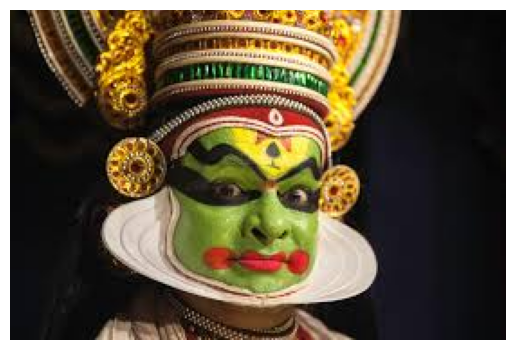

In [46]:
ImagePath=r"/content/image2.jpg"

# Load the image using image.load_img
img = image.load_img(ImagePath)

# Display the image
plt.imshow(img) # Pass the image data, not the file path.
plt.axis('off')  # Turn off axis labels
plt.show()

test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)

test_image = image.img_to_array(test_image)

In [47]:
test_image=np.expand_dims(test_image,axis=0)
result=Model.predict(test_image,verbose=0)

print('This is',Result_class[np.argmax(result)])

This is kathakali


In [ ]:
Model.save('cnn_model.keras')